In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

import os
import json
from zipfile import ZipFile
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)





Path to dataset files: /kaggle/input/plantvillage-dataset


In [ ]:
import os

print("Top-level contents:")
print(os.listdir(path))

inner_path = os.path.join(path, 'plantvillage dataset')  # replace 'PlantVillage' with actual folder name
print("Subfolders (classes):", os.listdir(inner_path))

color_path = os.path.join(path, 'plantvillage dataset', 'color')
print(os.listdir(color_path))
print(len(os.listdir(color_path)))

gray_path=os.path.join(path, 'plantvillage dataset', 'grayscale')
print(os.listdir(gray_path))
print(len(os.listdir(gray_path)))




Top-level contents:
['plantvillage dataset']
Subfolders (classes): ['segmented', 'grayscale', 'color']
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)_

In [ ]:
# 1. Count how many files are inside “Grape___healthy”
grape_folder = os.path.join(color_path, "Grape___healthy")
print(len(os.listdir(grape_folder)))

# 2. Show the first five filenames inside that same folder
print(os.listdir(grape_folder)[:5])


423
['71af6c2b-b3ed-4629-8aaa-7b60187caee1___Mt.N.V_HL 9069.JPG', '244804b5-05e2-4372-a376-36a0655aff41___Mt.N.V_HL 6121.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '4bd0c235-94b2-4d5d-a76e-58df595e7802___Mt.N.V_HL 6032.JPG', '12331981-d038-4eb0-a1c6-64b27f226cab___Mt.N.V_HL 6106.JPG']


(256, 256, 3)


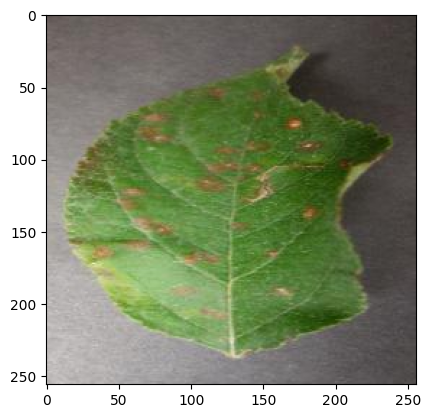

[[[104  94  92]
  [102  92  90]
  [101  91  89]
  ...
  [ 67  62  59]
  [ 64  59  56]
  [ 62  57  54]]

 [[ 98  88  86]
  [ 96  86  84]
  [ 95  85  83]
  ...
  [ 65  60  57]
  [ 64  59  56]
  [ 63  58  55]]

 [[101  91  89]
  [ 99  89  87]
  [ 97  87  85]
  ...
  [ 63  58  55]
  [ 63  58  55]
  [ 63  58  55]]

 ...

 [[182 178 177]
  [180 176 175]
  [183 179 178]
  ...
  [ 78  74  73]
  [ 82  78  77]
  [ 87  83  82]]

 [[187 183 182]
  [182 178 177]
  [181 177 176]
  ...
  [ 81  77  76]
  [ 82  78  77]
  [ 84  80  79]]

 [[194 190 189]
  [186 182 181]
  [182 178 177]
  ...
  [ 82  78  77]
  [ 78  74  73]
  [ 75  71  70]]]


In [ ]:
base_dir = 'plantvillage dataset/color'
temp_img = os.path.join(
    color_path,                 # e.g. "/content/…/plantvillage dataset/color"
    'Apple___Cedar_apple_rust',
    'd3df6ac8-4b20-460a-ad91-68e50d49078c___FREC_C.Rust 3879.JPG'
)

img=mpimg.imread(temp_img)
print(img.shape)
plt.imshow(img)
plt.show()
print(img)


In [ ]:

# Image Parameters
img_size = 224
batch_size = 32


In [ ]:
def to_grayscale(x):
    # x is a NumPy array, shape (height, width, 3), with pixel values in [0, 255] or [0, 1]
    # We assume x is already a float32 array in [0, 1] (because rescale=1./255 runs first).
    # Convert to grayscale: result is shape (height, width, 1).
    gray = tf.image.rgb_to_grayscale(x)                           # shape=(h, w, 1)
    return gray.numpy()   #

In [ ]:
base_dir = os.path.join(path, 'plantvillage dataset', 'color')

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical',
    color_mode='grayscale'   # Only this is needed
)

# Train Generator

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical',
    color_mode='grayscale'
)



Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
x_batch, y_batch = next(train_generator)
print("Image batch shape:", x_batch.shape)  # Should be (32, 224, 224, 1)


Image batch shape: (32, 224, 224, 1)


In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))




model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    11,075,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,141,350 (42.50 MB)

 Trainable params: 11,141,350 (42.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     # watch validation loss
    patience=1,             # allow 2 epochs of no improvement
    restore_best_weights=True
)


In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=4,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,  # Validation steps
    callbacks=[early_stopping]

)

Epoch 1/4
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 126s 90ms/step - accuracy: 0.4903 - loss: 1.8786 - val_accuracy: 0.7940 - val_loss: 0.6519
Epoch 2/4
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 122s 90ms/step - accuracy: 0.8310 - loss: 0.5336 - val_accuracy: 0.8511 - val_loss: 0.4729
Epoch 3/4
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.9020 - loss: 0.3036 - val_accuracy: 0.8499 - val_loss: 0.4907


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.8534 - loss: 0.4615
Validation Accuracy: 85.11%


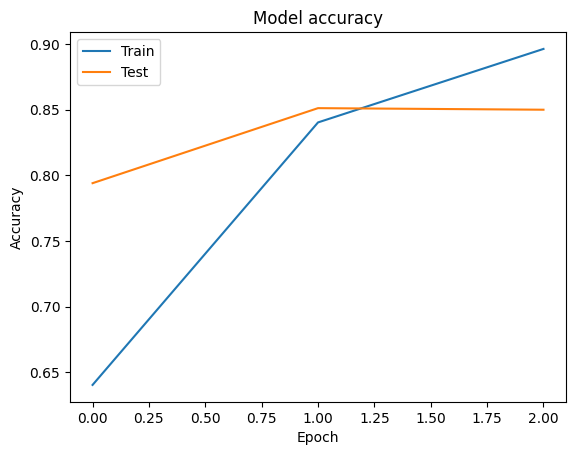

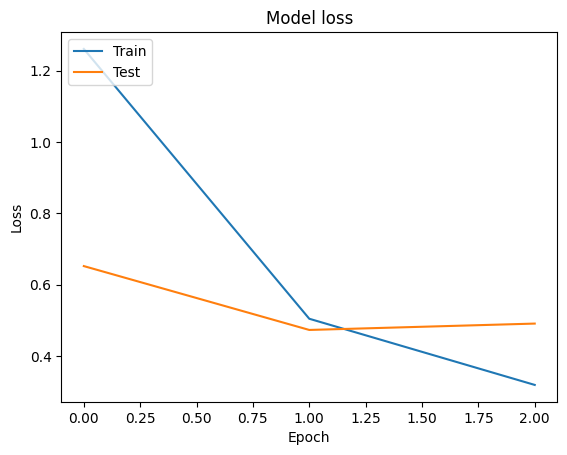

In [99]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



BUILDING A PREDICTIVE SYSTEM

In [100]:
from PIL import Image
import numpy as np
import json

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Loads an image from disk, converts to grayscale, resizes to (target_size),
    adds the channel and batch dimensions, and scales pixel values to [0, 1].
    """
    img = Image.open(image_path).convert('L')           # convert to grayscale
    img = img.resize(target_size)                        # resize to 224×224
    img_array = np.array(img)                            # shape: (224, 224)
    img_array = np.expand_dims(img_array, axis=-1)       # shape: (224, 224, 1)
    img_array = np.expand_dims(img_array, axis=0)        # shape: (1, 224, 224, 1)
    img_array = img_array.astype('float32') / 255.0       # scale to [0, 1]
    return img_array

def predict_image_class(model, image_path, index_to_class):
    """
    Given a trained Keras/TensorFlow model, an image path, and a dict mapping indices→class names,
    returns the predicted class name (as a string).
    """
    img_tensor = load_and_preprocess_image(image_path)
    predictions = model.predict(img_tensor)                     # shape: (1, num_classes)
    predicted_index = np.argmax(predictions, axis=1)[0]         # e.g. np.int64(2)
    return index_to_class[int(predicted_index)]                 # cast to plain int

# ─── Prepare index→class mapping exactly once ───────────────────────────────────
# (train_generator.class_indices is { 'class_name': index, ... })
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

# (Optional) Save this mapping to JSON for later use:
with open('class_indices.json', 'w') as f:
    json.dump(index_to_class, f)

# ─── Example Usage ───────────────────────────────────────────────────────────────
image_path = '/content/appleblackrot.jpg'  # replace with whichever image you want to classify
predicted_class_name = predict_image_class(model, image_path, index_to_class)
print("Predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class Name: Orange___Haunglongbing_(Citrus_greening)


In [103]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: Mountpoint must not already contain files

In [102]:
model.save('drive/MyDrive/projects/plant disease prediction/gray_model.h5')


In [104]:
!ls /content/drive


MyDrive


In [109]:
# (No need to call drive.mount again.)
model.save("/content/drive/MyDrive/gray_model.h5")


In [110]:
model.save('gray_plant_disease_prediction_model.h5')

In [ ]:
/content/gray_plant_disease_prediction_model.h5